In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


        Yadav\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[30]

"ham\tWait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us"

In [6]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages[0] #\t means tab separated.

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [10]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### Feature Engineering Important for NLP

In [14]:
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
%matplotlib inline

<Axes: ylabel='Frequency'>

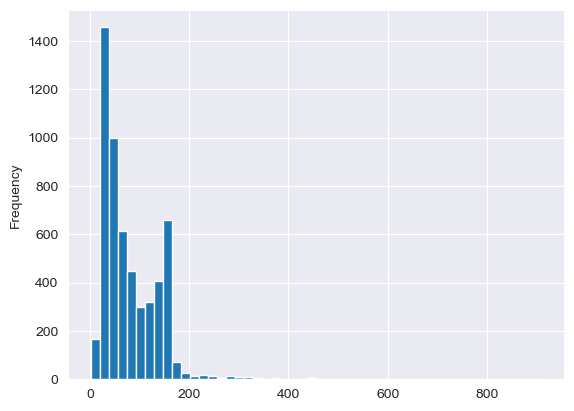

In [18]:
sns.set_style('darkgrid')
messages['length'].plot.hist(bins=50)

In [19]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

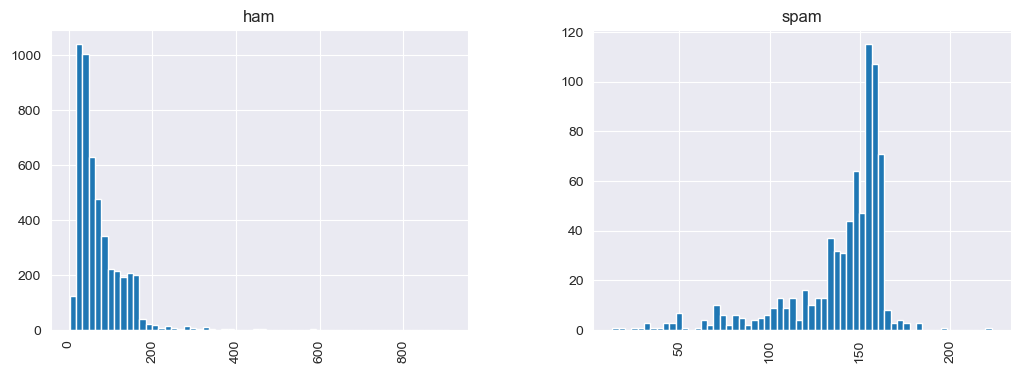

In [21]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4)) #length is good feature to differentiate between spam and ham.

In [22]:
# Bag of words to vectorize the string into numbers.

In [23]:
import string

In [24]:
mess = 'Sample Message! Notice: It has punctuation:'

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
no_punc= [c for c in mess if c not in string.punctuation]

In [27]:
no_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [28]:
from nltk.corpus import stopwords

In [29]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
no_punc=''.join(no_punc) #concatenates the list using whatever we put inside ' '.

In [31]:
no_punc

'Sample Message Notice It has punctuation'

In [32]:
no_punc.split()

['Sample', 'Message', 'Notice', 'It', 'has', 'punctuation']

In [33]:
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [34]:
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

In [35]:
def text_process(mess):
    """
    (1) Remove Punctuations.
    (2) Remove stopwords.
    (3) Return list of clean text words.

    """
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [36]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [38]:
# There are other methods of preprocessing text data like stemming as well. Here it won't work great as messages have shorthand.

In [39]:
# Convert each message into vectors now.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [42]:
print(len(bow_transformer.vocabulary_))

11425


In [43]:
mess_for = messages['message'][3]

In [44]:
print(mess_for)

U dun say so early hor... U c already then say...


In [45]:
bow4 = bow_transformer.transform([mess_for])

In [46]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [47]:
print(bow4.shape)

(1, 11425)


In [48]:
bow_transformer.get_feature_names_out()[4068]

'U'

In [49]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [50]:
messages_bow = bow_transformer.transform(messages['message'])

In [51]:
print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [52]:
messages_bow.nnz #Non zero occurences.

50548

In [53]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [54]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity))) #No of non zeros vs zeros in the matrix is sparsity.

sparsity: 0.07940295412668218


In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [57]:
tfidf4 = tfidf_transformer.transform(bow4)

In [58]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [59]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [60]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [63]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [64]:
messages['label'][3]

'ham'

In [65]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [66]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
msg_train,msg_test,label_train,label_test =train_test_split(messages['message'],messages['label'],test_size=0.3)

In [69]:
msg_train

4610                               Y de asking like this.
1999    Well, I have to leave for my class babe ... Yo...
4557                              Gettin rdy to ship comp
1013        I dunno they close oredi not... Ü v ma fan...
4880    Yeah just open chat and click friend lists. Th...
                              ...                        
3289    Someone U know has asked our dating service 2 ...
20              Is that seriously how you spell his name?
881     Reminder: You have not downloaded the content ...
5252    You do your studies alone without anyones help...
4008                          I'm reaching home in 5 min.
Name: message, Length: 3900, dtype: object

In [70]:
# We Won't be doing this whole process again and again in real life we will just use Scikit Learn Data Pipeline.

In [71]:
from sklearn.pipeline import Pipeline

In [72]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('claasifier', MultinomialNB())
])

In [ ]:
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_test,predictions))